In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
confirmed_death_data = pd.read_csv("daily-covid-cases-deaths.csv")
confirmed_death_data.head()

,Entity,Code,Day,Daily new confirmed cases of COVID-19,Daily new confirmed deaths due to COVID-19
0,Afghanistan,AFG,2020-02-24,5.0,NaN
1,Afghanistan,AFG,2020-02-25,0.0,NaN
2,Afghanistan,AFG,2020-02-26,0.0,NaN
3,Afghanistan,AFG,2020-02-27,0.0,NaN
4,Afghanistan,AFG,2020-02-28,0.0,NaN


In [3]:
india_data = confirmed_death_data[confirmed_death_data['Entity'] == "India"].copy()
india_data.head()

,Entity,Code,Day,Daily new confirmed cases of COVID-19,Daily new confirmed deaths due to COVID-19
63049,India,IND,2020-01-30,1.0,NaN
63050,India,IND,2020-01-31,0.0,NaN
63051,India,IND,2020-02-01,0.0,NaN
63052,India,IND,2020-02-02,1.0,NaN
63053,India,IND,2020-02-03,1.0,NaN


In [4]:
india_data.drop(['Entity','Code'],axis=1,inplace=True)

In [5]:
india_data['Day'] = pd.to_datetime(india_data['Day'])
india_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 696 entries, 63049 to 63744
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Day                                         696 non-null    datetime64[ns]
 1   Daily new confirmed cases of COVID-19       696 non-null    float64       
 2   Daily new confirmed deaths due to COVID-19  654 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.8 KB


In [6]:
india_data.set_index('Day',inplace=True)
india_data

,Daily new confirmed cases of COVID-19,Daily new confirmed deaths due to COVID-19
Day,,
2020-01-30,1.0,NaN
2020-01-31,0.0,NaN
2020-02-01,0.0,NaN
2020-02-02,1.0,NaN
2020-02-03,1.0,NaN
...,...,...
2021-12-21,6317.0,318.0
2021-12-22,7495.0,434.0
2021-12-23,6650.0,374.0


In [7]:
india_data.index.freq = "D"

In [8]:
india_data.rename(columns={"Daily new confirmed cases of COVID-19":"confirmed","Daily new confirmed deaths due to COVID-19":"deaths"},inplace=True)
india_data

,confirmed,deaths
Day,,
2020-01-30,1.0,NaN
2020-01-31,0.0,NaN
2020-02-01,0.0,NaN
2020-02-02,1.0,NaN
2020-02-03,1.0,NaN
...,...,...
2021-12-21,6317.0,318.0
2021-12-22,7495.0,434.0
2021-12-23,6650.0,374.0


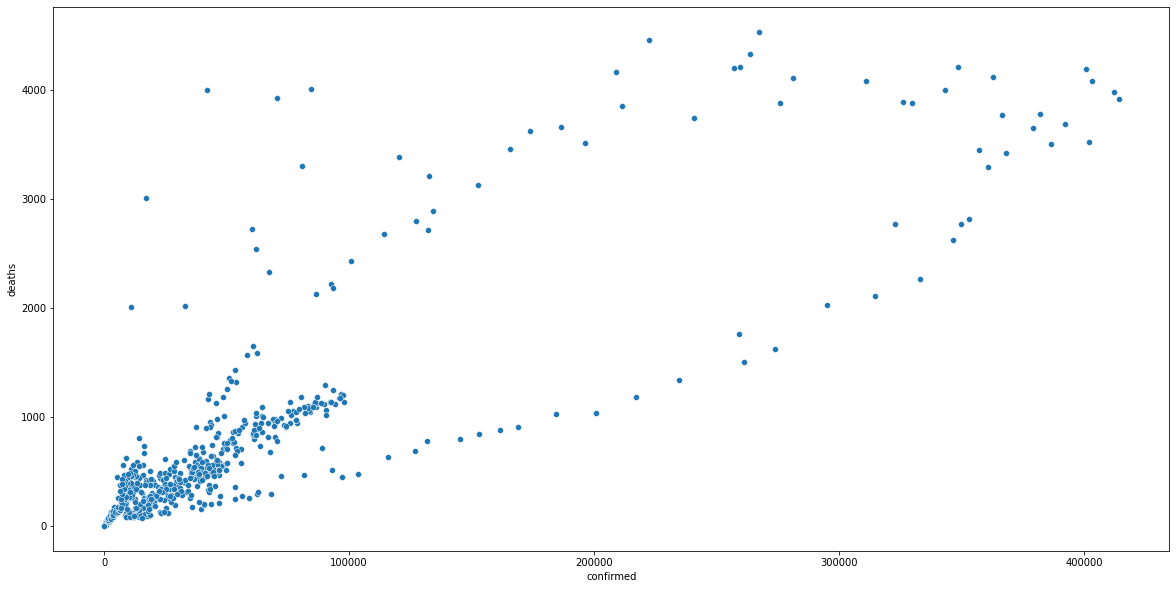

In [9]:
plt.rcParams['figure.figsize'] = [20,10]
sns.scatterplot(data=india_data,x="confirmed",y="deaths")
plt.show()

In [10]:
tests_done = pd.read_csv("full-list-covid-19-tests-per-day.csv")

In [11]:
tests_done.head()

,Entity,Code,Day,new_tests,142602-annotations
0,Albania,ALB,2020-02-25,8,tests performed
1,Albania,ALB,2020-02-26,5,tests performed
2,Albania,ALB,2020-02-27,4,tests performed
3,Albania,ALB,2020-02-28,1,tests performed
4,Albania,ALB,2020-02-29,8,tests performed


In [12]:
india_tests = tests_done[tests_done['Entity'] == "India"].copy()

In [13]:
india_tests

,Entity,Code,Day,new_tests,142602-annotations
21022,India,IND,2020-03-19,191,samples tested
21023,India,IND,2020-03-20,1060,samples tested
21024,India,IND,2020-03-21,1325,samples tested
21025,India,IND,2020-03-22,1298,samples tested
21026,India,IND,2020-03-23,3708,samples tested
...,...,...,...,...,...
21641,India,IND,2021-12-20,1003215,samples tested
21642,India,IND,2021-12-21,1014079,samples tested
21643,India,IND,2021-12-22,1229512,samples tested
21644,India,IND,2021-12-23,1287758,samples tested


In [14]:
india_tests.drop(['Entity','Code','142602-annotations'],axis=1,inplace=True)


In [15]:
india_tests['Day'] = pd.to_datetime(india_tests['Day'])
india_tests.set_index('Day',inplace=True)
india_tests

,new_tests
Day,
2020-03-19,191
2020-03-20,1060
2020-03-21,1325
2020-03-22,1298
2020-03-23,3708
...,...
2021-12-20,1003215
2021-12-21,1014079
2021-12-22,1229512


In [16]:
india_tests.asfreq("D")

,new_tests
Day,
2020-03-19,191.0
2020-03-20,1060.0
2020-03-21,1325.0
2020-03-22,1298.0
2020-03-23,3708.0
...,...
2021-12-20,1003215.0
2021-12-21,1014079.0
2021-12-22,1229512.0


In [17]:
india_tests = india_tests.asfreq("D")

In [18]:
india_tests.index

DatetimeIndex(['2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
               '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
               '2020-03-27', '2020-03-28',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-18',
               '2021-12-19', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-24'],
              dtype='datetime64[ns]', name='Day', length=646, freq='D')

In [19]:
india = pd.merge(india_data,india_tests,how="outer",on=['Day'])
india

,confirmed,deaths,new_tests
Day,,,
2020-01-30,1.0,NaN,NaN
2020-01-31,0.0,NaN,NaN
2020-02-01,0.0,NaN,NaN
2020-02-02,1.0,NaN,NaN
2020-02-03,1.0,NaN,NaN
...,...,...,...
2021-12-21,6317.0,318.0,1014079.0
2021-12-22,7495.0,434.0,1229512.0
2021-12-23,6650.0,374.0,1287758.0


In [20]:
import pandas_profiling

In [21]:
pandas_profiling.ProfileReport(india)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]


C:\Users\amar\AppData\Local\Temp/ipykernel_26672/3144785498.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


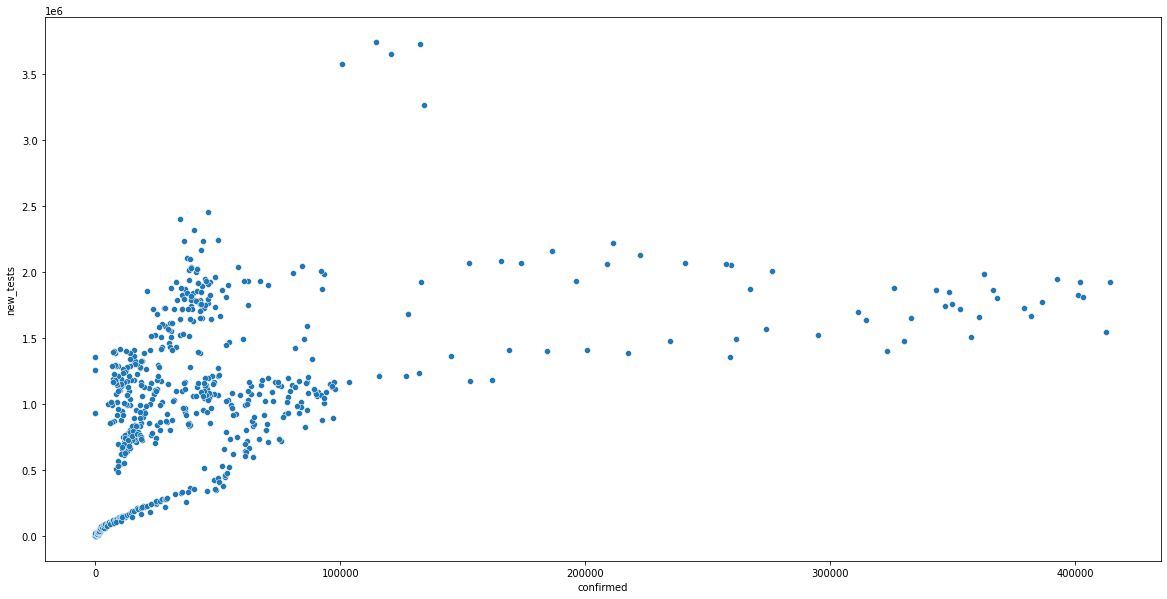

In [22]:
sns.scatterplot(data=india,x="confirmed",y="new_tests")
plt.show()

C:\Users\amar\AppData\Local\Temp/ipykernel_26672/2400786037.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


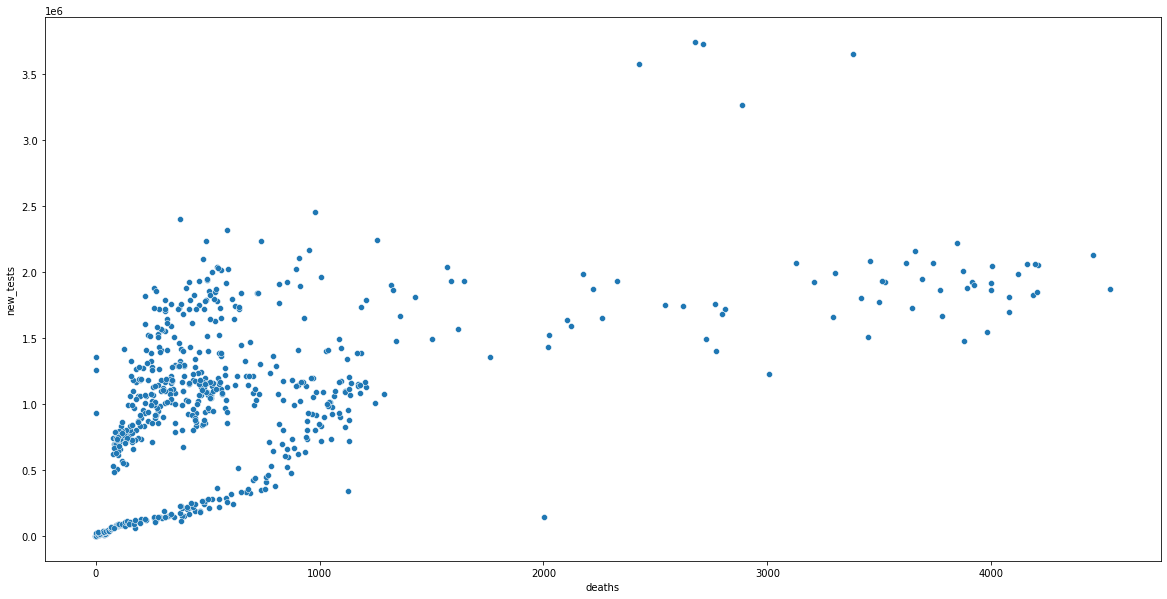

In [23]:
sns.scatterplot(data=india,x="deaths",y="new_tests")
plt.show()

In [24]:
from mpl_toolkits import mplot3d

C:\Users\amar\AppData\Local\Temp/ipykernel_26672/2188099141.py:9: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


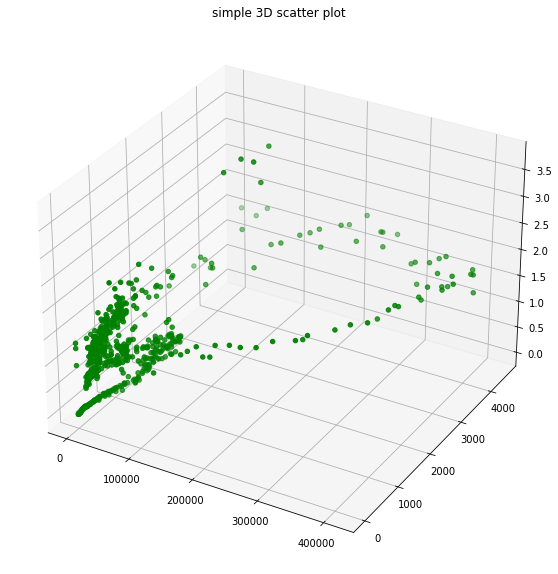

In [25]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(india['confirmed'], india['deaths'],india['new_tests'], color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

C:\Users\amar\AppData\Local\Temp/ipykernel_26672/880144609.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


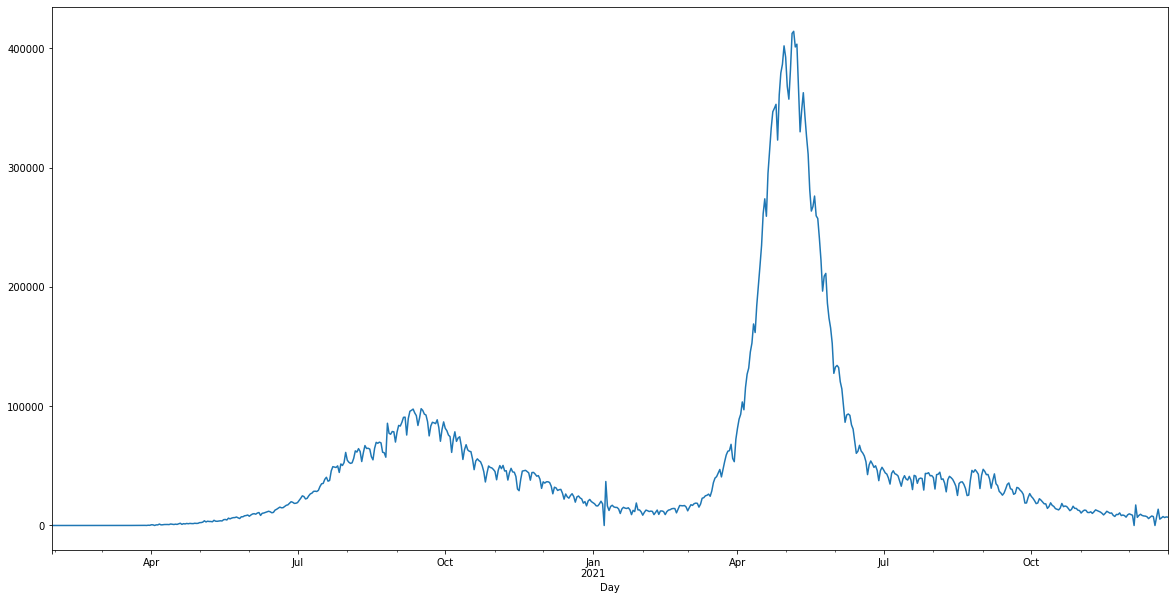

In [26]:
india['confirmed'].plot()
plt.show()

C:\Users\amar\AppData\Local\Temp/ipykernel_26672/2720024174.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


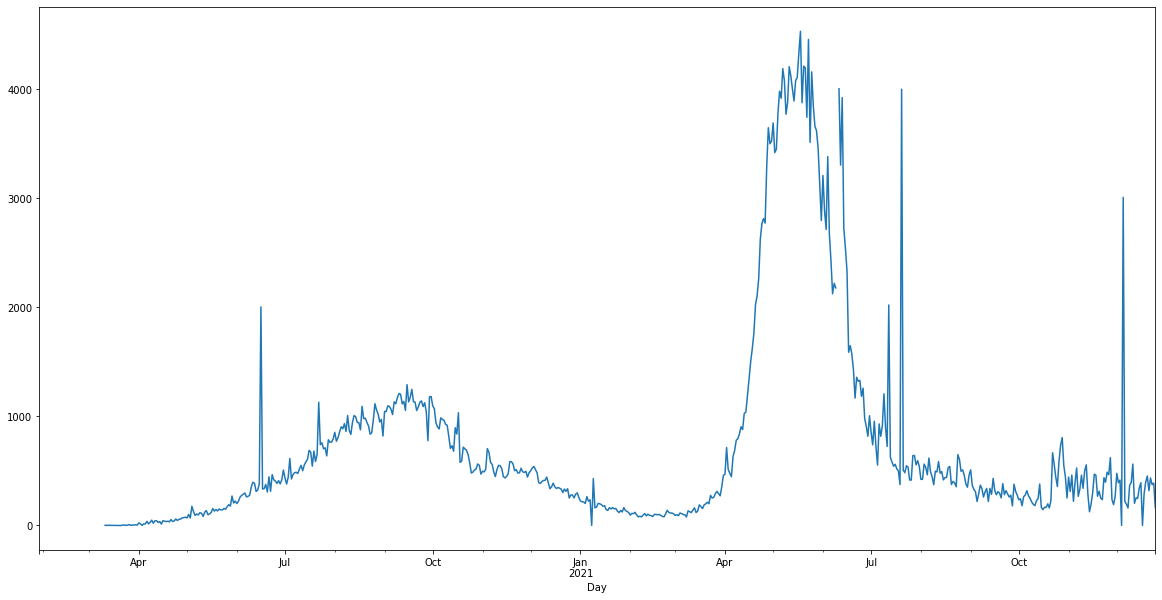

In [27]:
india['deaths'].plot()
plt.show()

C:\Users\amar\AppData\Local\Temp/ipykernel_26672/2820211240.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


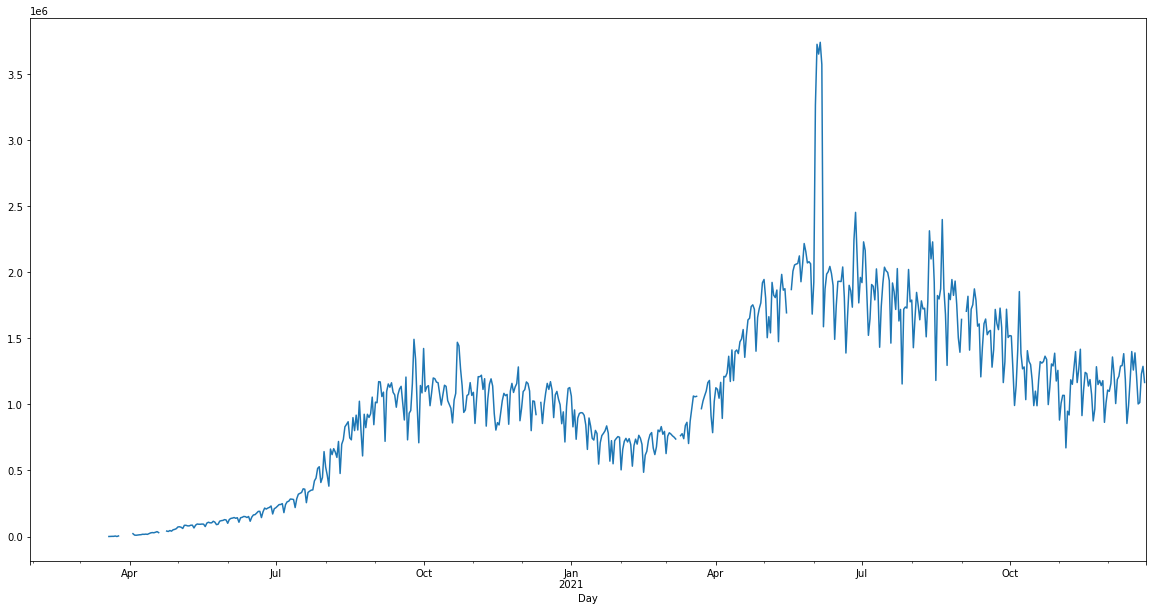

In [28]:
india['new_tests'].plot()
plt.show()

In [29]:
corr = india.corr()
corr

,confirmed,deaths,new_tests
confirmed,1.000000,0.852622,0.445182
deaths,0.852622,1.000000,0.538451
new_tests,0.445182,0.538451,1.000000


C:\Users\amar\AppData\Local\Temp/ipykernel_26672/108938970.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


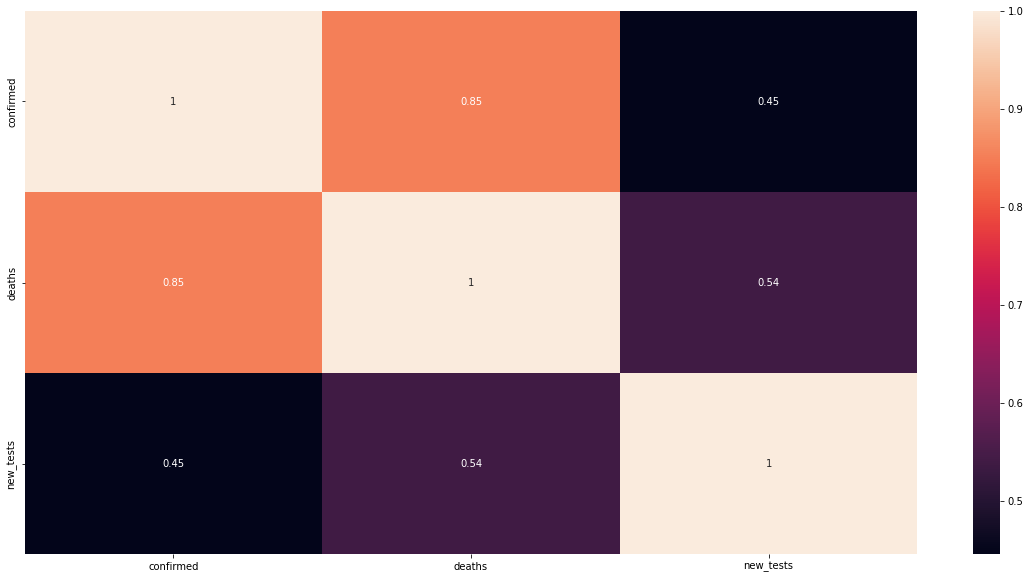

In [30]:
sns.heatmap(corr,annot=True)
plt.show()

In [31]:
upto = pd.read_csv("india_upto_data.csv",parse_dates=True,index_col=["Day"])


In [32]:
upto

,confirmed
Day,
2020-02-01,0.33333
2020-02-02,0.50000
2020-02-03,0.60000
2020-02-04,0.50000
2020-02-05,0.42857
...,...
2021-12-20,6931.42857
2021-12-21,6836.14286
2021-12-22,6767.71429


In [33]:
upto= upto.asfreq("D")
upto

,confirmed
Day,
2020-02-01,0.33333
2020-02-02,0.50000
2020-02-03,0.60000
2020-02-04,0.50000
2020-02-05,0.42857
...,...
2021-12-20,6931.42857
2021-12-21,6836.14286
2021-12-22,6767.71429


In [34]:
upto.rename(columns={"confirmed":"avg_confirmed"},inplace=True)
upto

,avg_confirmed
Day,
2020-02-01,0.33333
2020-02-02,0.50000
2020-02-03,0.60000
2020-02-04,0.50000
2020-02-05,0.42857
...,...
2021-12-20,6931.42857
2021-12-21,6836.14286
2021-12-22,6767.71429


In [35]:
india = pd.merge(india,upto,how="outer",on=['Day'])

In [36]:
india.isna().sum()

confirmed         0
deaths           42
new_tests        72
avg_confirmed     3
dtype: int64

In [37]:
india

,confirmed,deaths,new_tests,avg_confirmed
Day,,,,
2020-01-30,1.0,NaN,NaN,NaN
2020-01-31,0.0,NaN,NaN,NaN
2020-02-01,0.0,NaN,NaN,0.33333
2020-02-02,1.0,NaN,NaN,0.50000
2020-02-03,1.0,NaN,NaN,0.60000
...,...,...,...,...
2021-12-21,6317.0,318.0,1014079.0,6836.14286
2021-12-22,7495.0,434.0,1229512.0,6767.71429
2021-12-23,6650.0,374.0,1287758.0,6653.85714


In [45]:
india[india['deaths']== 0]

,confirmed,deaths,new_tests,avg_confirmed
Day,,,,
2020-03-12,11.0,0.0,NaN,6.14286
2020-03-14,20.0,0.0,NaN,9.71429
2020-03-15,11.0,0.0,NaN,10.57143
2020-03-16,6.0,0.0,NaN,10.85714
2020-03-18,14.0,0.0,NaN,13.42857
2020-03-24,37.0,0.0,157.0,56.28571
2020-03-27,160.0,0.0,NaN,91.85714
2020-04-03,24.0,0.0,21294.0,240.00000
2021-01-08,0.0,0.0,935369.0,15375.57143


In [82]:
india.to_csv("india_cases.csv")

In [84]:
india.isna().sum()

confirmed     0
deaths       42
new_tests    72
dtype: int64